In [1]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import utils
from voc_dataset import VOCDataset
from train_q2 import ResNet

/home/argo/miniconda3/envs/spring/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
test_loader = utils.get_data_loader('voc', train=False, batch_size=2000, split='test', inp_size=224)
# model = ResNet(len(VOCDataset.CLASS_NAMES)).cpu()
PATH = "checkpoint-model-epoch49.pth"
model = torch.load(PATH).cpu()
model.eval()

with torch.no_grad():
    for data, target, _ in iter(test_loader):
        data = data.cpu()
        feats = model(data)
        feats = feats.cpu().numpy()
        targets = target.cpu().numpy()
        break



In [14]:
# colors = np.random.randint(0, 255, size=(20, 3))
# feats_tsne = TSNE(n_components=2).fit_transform(feats)
# targets_idx = np.argmax(targets, axis=1)

# targets = np.expand_dims(targets, axis=-1)
# colors = np.expand_dims(colors, axis=0) 

# colored_targets = targets * colors
# colored_targets = colored_targets.sum(axis=1)
# colored_targets = colored_targets/(targets.sum(axis=1))

In [15]:
class_names = VOCDataset.CLASS_NAMES
# target_names = [class_names[i] for i in targets_idx]

/tmp/ipykernel_223230/4196194458.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([-40], [-40], c=colors[0][i]/255, label=class_names[i])


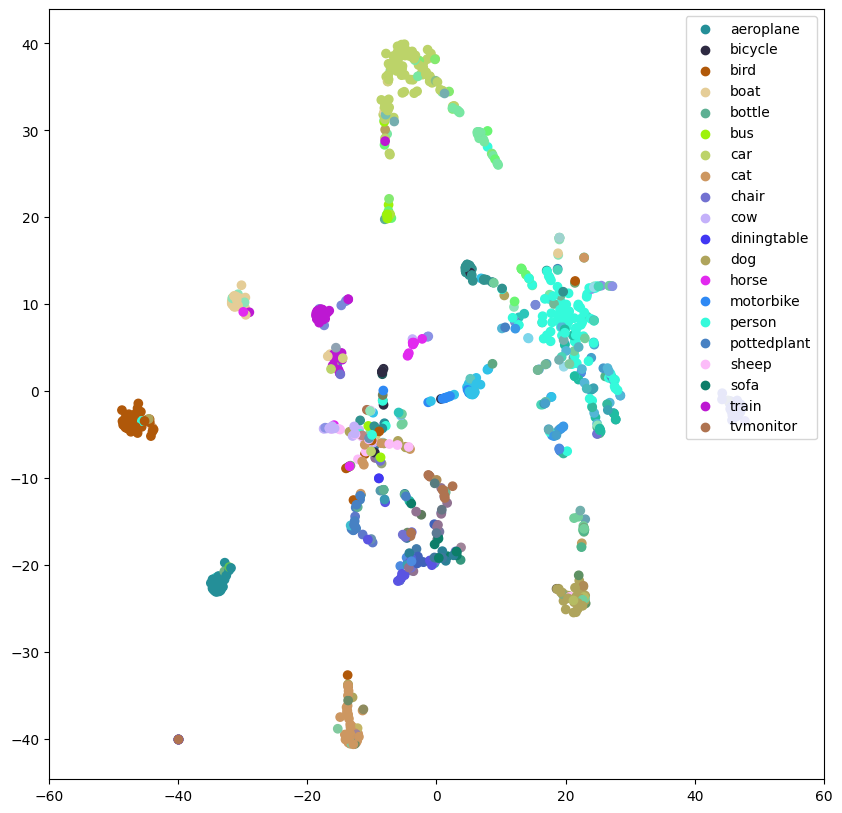

In [30]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(feats_tsne[:, 0], feats_tsne[:, 1], c=colored_targets)
for i in range(20):
    plt.scatter([-40], [-40], c=colors[i]/255, label=class_names[i])
plt.xlim(-60, 60)
plt.legend()
plt.savefig('tsne.png')

In [22]:
# colors[i]

array([[ 36, 143, 152],
       [ 46,  42,  66],
       [176,  88,   9],
       [229, 205, 151],
       [ 93, 176, 147],
       [157, 242,   9],
       [188, 211, 105],
       [205, 151,  97],
       [114, 113, 209],
       [196, 177, 250],
       [ 65,  55, 243],
       [175, 164,  92],
       [226,  41, 239],
       [ 46, 137, 244],
       [ 52, 250, 219],
       [ 71, 129, 195],
       [252, 188, 249],
       [ 12, 126, 105],
       [189,  24, 210],
       [175, 115,  80]])

In [29]:
# colors[1]

IndexError: index 1 is out of bounds for axis 0 with size 1